# Laboratory practice № 8 (Modal controllers and observers)

Done by Zolotarev Dmitriy (isu: 311791, group: R33353)

Variant: 2

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from matplotlib.ticker import FormatStrFormatter
import scipy

import seaborn as sns
sns.set_style("whitegrid")

color = ["#031B88", "#FB7B8E", "#AAB6FB", "#8A2BE2"]
sns.set_palette(color)

In [2]:
dt = 0.001

In [3]:
t = sympy.symbols("t",real=True)

## Task 1

In [4]:
A = np.array([
    [-2, 0, 0, 0],
    [0, 3, 0, 0],
    [0, 0, 1, 3],
    [0, 0, -3, 1]
])

B = np.array([
    [0],
    [5],
    [0],
    [2]
])

sigma_1 = [-2]*4
sigma_2 = [-2, -20, -200, -200]
sigma_3 = [-2, -20, 3j, -3j]
sigma_4 = [-2, -20, -4 + 3j, -4 -3j]


In [5]:
U = np.concatenate([B, A@B, A@A@B, A@A@A@B],axis=1)
U

array([[  0,   0,   0,   0],
       [  5,  15,  45, 135],
       [  0,   6,  12, -36],
       [  2,   2, -16, -52]])

In [6]:
np.linalg.matrix_rank(U)

3

In [7]:
scipy.linalg.eigvals(A)

array([ 1.+3.j,  1.-3.j, -2.+0.j,  3.+0.j])

In [8]:
J_P, J = sympy.Matrix(A).jordan_form()

In [9]:
J_P

Matrix([
[1, 0, 0,  0],
[0, 1, 0,  0],
[0, 0, I, -I],
[0, 0, 1,  1]])

In [10]:
J_P.inv()@B

Matrix([
[0],
[5],
[1],
[1]])

-1 is not controllable, but stable

In [11]:
sigma_1

[-2, -2, -2, -2]

In [12]:
G_1 = np.array([
    [-2, 1, 0, 0],
    [0, -2, 1, 0],
    [0, 0, -2, 1],
    [0, 0, 0, -2]
])
Y_1 = np.array([0,1,1,1]).reshape((1,-1))

In [13]:
B@Y_1

array([[0, 0, 0, 0],
       [0, 5, 5, 5],
       [0, 0, 0, 0],
       [0, 2, 2, 2]])

In [14]:
P_1 = scipy.linalg.solve_sylvester(A,-G_1,B@Y_1)
P_1

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.        ,  1.2       ,  1.24      ],
       [ 0.        , -0.33333333, -0.44444444, -0.46296296],
       [ 0.        ,  0.33333333,  0.33333333,  0.31481481]])

In [15]:
K_1 = -Y_1 @ np.linalg.pinv(P_1)
K_1

array([[ 0.        , -1.92307692, -3.46153846, -0.69230769]])

In [16]:
scipy.linalg.eigvals(A + B@K_1)

array([-1.99996787+5.5651091e-05j, -1.99996787-5.5651091e-05j,
       -2.00006426+0.0000000e+00j, -2.        +0.0000000e+00j])

In [17]:
sys_1 = ctrl.ss(A + B@K_1,np.zeros((4,1)),np.zeros((1,4)),0)
sys_1

StateSpace(array([[ -2.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  -6.61538462, -17.30769231,  -3.46153846],
       [  0.        ,   0.        ,   1.        ,   3.        ],
       [  0.        ,  -3.84615385,  -9.92307692,  -0.38461538]]), array([[0.],
       [0.],
       [0.],
       [0.]]), array([[0., 0., 0., 0.]]), array([[0.]]))

In [18]:
time_1 = np.linspace(0,10,int(10/dt))

In [19]:
y_1 = ctrl.initial_response(sys_1,time_1,X0=np.ones((4,1)))

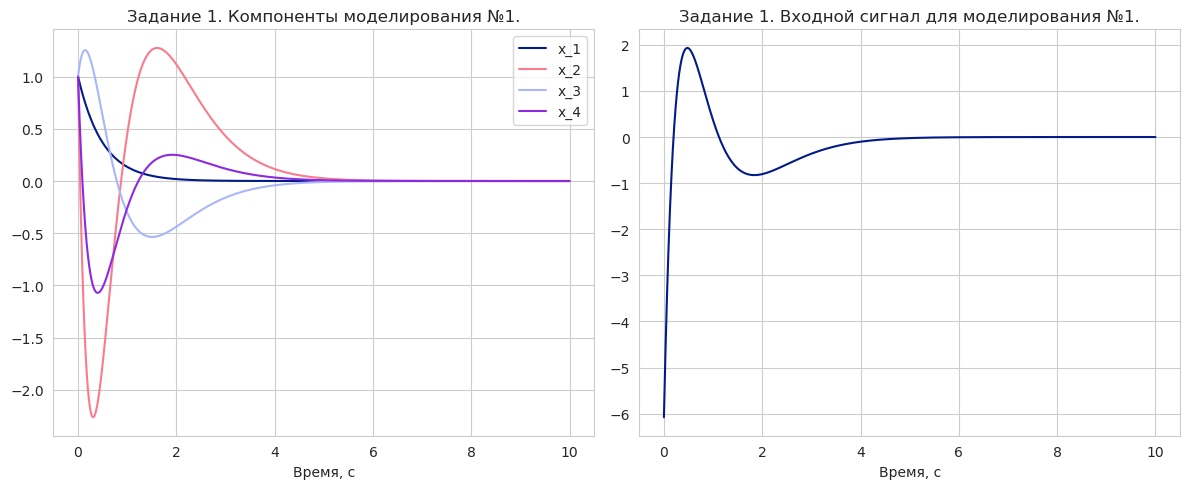

In [20]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot states on the first subplot
axs[0].plot(time_1, y_1.states[0, :], label="x_1")
axs[0].plot(time_1, y_1.states[1, :], label="x_2")
axs[0].plot(time_1, y_1.states[2, :], label="x_3")
axs[0].plot(time_1, y_1.states[3, :], label="x_4")
axs[0].set_title("Задание 1. Компоненты моделирования №1.")
axs[0].grid(True)
axs[0].set_xlabel("Время, с")  # Add x-axis label
axs[0].legend()

# Plot control signal on the second subplot
axs[1].plot(time_1, (K_1 @ y_1.states).reshape(-1))
axs[1].set_title("Задание 1. Входной сигнал для моделирования №1.")
axs[1].grid(True)
axs[1].set_xlabel("Время, с")  # Add x-axis label

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [21]:
sigma_2

[-2, -20, -200, -200]

In [22]:
G_2 = np.array([
    [-2, 0, 0, 0],
    [0, -20, 0, 0],
    [0, 0, -200, 1],
    [0, 0, 0, -200]
])
Y_2 = np.array([0,1,1,1]).reshape((1,-1))
P_2 = scipy.linalg.solve_sylvester(A,-G_2,B@Y_2)
K_2 = -Y_2 @ np.linalg.pinv(P_2)
K_2

array([[     0.        , -14581.64615357,  16022.07692276,
         36241.61538392]])

In [23]:
A

array([[-2,  0,  0,  0],
       [ 0,  3,  0,  0],
       [ 0,  0,  1,  3],
       [ 0,  0, -3,  1]])

In [24]:
P_2

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.17391304e-01,  2.46305419e-02,
         2.47518746e-02],
       [ 0.00000000e+00, -1.33333333e-02, -1.48478099e-04,
        -1.49955164e-04],
       [ 0.00000000e+00,  9.33333333e-02,  9.94803267e-03,
         9.99750332e-03]])

In [25]:
scipy.linalg.eigvals(A + B@K_2)

array([-200.+0.00197772j, -200.-0.00197772j,  -20.+0.j        ,
         -2.+0.j        ])

In [26]:
sys_2 = ctrl.ss(A + B@K_2,np.zeros((4,1)),np.zeros((1,4)),0)
time_2 = np.linspace(0,0.2,int(1/dt))
y_2 = ctrl.initial_response(sys_2,time_2,X0=np.ones((4,1)))

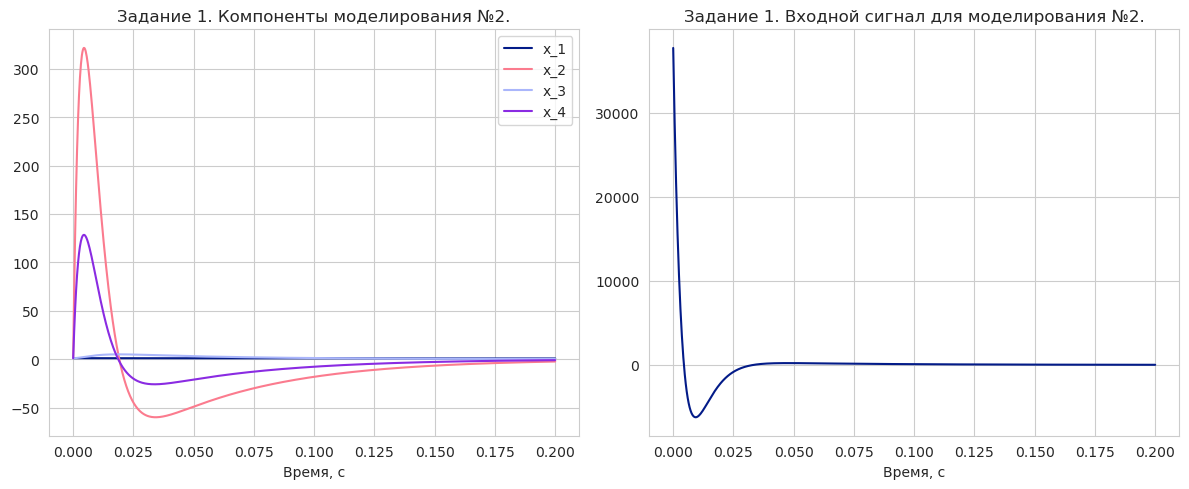

In [27]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot states on the first subplot
axs[0].plot(time_2, y_2.states[0, :], label="x_1")
axs[0].plot(time_2, y_2.states[1, :], label="x_2")
axs[0].plot(time_2, y_2.states[2, :], label="x_3")
axs[0].plot(time_2, y_2.states[3, :], label="x_4")
axs[0].set_title("Задание 1. Компоненты моделирования №2.")
axs[0].grid(True)
axs[0].set_xlabel("Время, с")  # Add x-axis label
axs[0].legend()

# Plot control signal on the second subplot
axs[1].plot(time_2, (K_2 @ y_2.states).reshape(-1))
axs[1].set_title("Задание 1. Входной сигнал для моделирования №2.")
axs[1].grid(True)
axs[1].set_xlabel("Время, с")  # Add x-axis label

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [28]:
sigma_3

[-2, -20, 3j, (-0-3j)]

In [29]:
G_3 = np.array([
    [-2, 0, 0, 0],
    [0, -20, 0, 0],
    [0, 0, 0, 3],
    [0, 0, -3, 0]
])
Y_3 = np.array([0,1,1,1]).reshape((1,-1))
P_3 = scipy.linalg.solve_sylvester(A,-G_3,B@Y_3)
K_3 = -Y_3 @ np.linalg.pinv(P_3)
K_3

array([[ 0.        , -6.36923077, -4.88461538,  3.42307692]])

In [30]:
scipy.linalg.eigvals(A + B@K_3)

array([-2.00000000e+01+0.j,  4.11476409e-15+3.j,  4.11476409e-15-3.j,
       -2.00000000e+00+0.j])

In [31]:
sys_3 = ctrl.ss(A + B@K_3,np.zeros((4,1)),np.zeros((1,4)),0)
time_3 = np.linspace(0,10,int(10/dt))
y_3 = ctrl.initial_response(sys_3,time_3,X0=np.ones((4,1)))

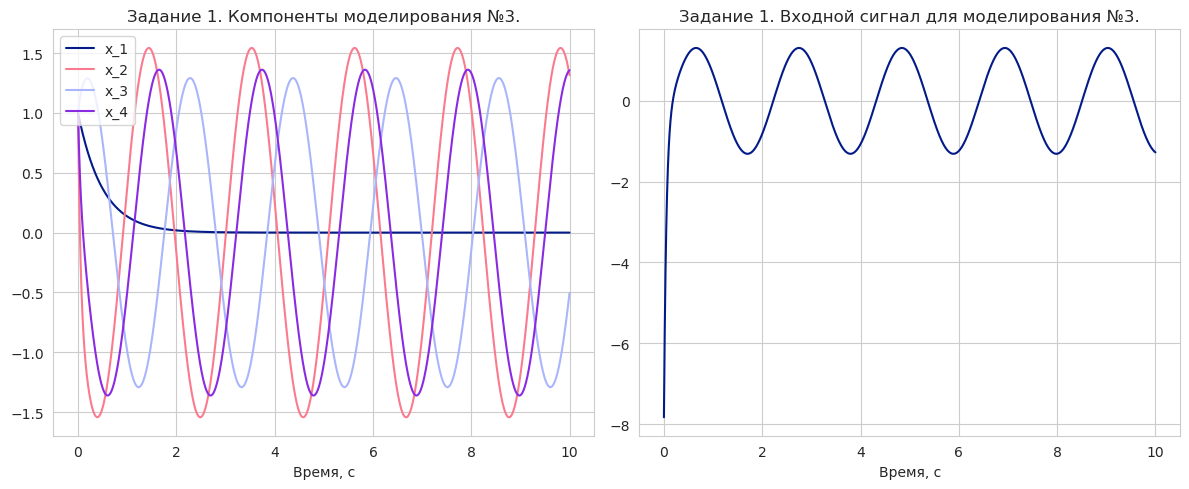

In [32]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot states on the first subplot
axs[0].plot(time_3, y_3.states[0, :], label="x_1")
axs[0].plot(time_3, y_3.states[1, :], label="x_2")
axs[0].plot(time_3, y_3.states[2, :], label="x_3")
axs[0].plot(time_3, y_3.states[3, :], label="x_4")
axs[0].set_title("Задание 1. Компоненты моделирования №3.")
axs[0].grid(True)
axs[0].set_xlabel("Время, с")  # Add x-axis label
axs[0].legend()

# Plot control signal on the second subplot
axs[1].plot(time_3, (K_3 @ y_3.states).reshape(-1))
axs[1].set_title("Задание 1. Входной сигнал для моделирования №3.")
axs[1].grid(True)
axs[1].set_xlabel("Время, с")  # Add x-axis label

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [33]:
sigma_4

[-2, -20, (-4+3j), (-4-3j)]

In [34]:
G_4 = np.array([
    [-2, 0, 0, 0],
    [0, -20, 0, 0],
    [0, 0, -4, 3],
    [0, 0, -3, -4]
])
Y_4 = np.array([0,1,1,1]).reshape((1,-1))
P_4 = scipy.linalg.solve_sylvester(A,-G_4,B@Y_4)
K_4 = -Y_4 @ np.linalg.pinv(P_4)
K_4

array([[  0.        , -20.52307692, -15.96153846,  34.80769231]])

In [35]:
scipy.linalg.eigvals(A + B@K_4)

array([-20.+0.j,  -4.+3.j,  -4.-3.j,  -2.+0.j])

In [36]:
sys_4 = ctrl.ss(A + B@K_4,np.zeros((4,1)),np.zeros((1,4)),0)
time_4 = np.linspace(0,2,int(5/dt))
y_4 = ctrl.initial_response(sys_4,time_4,X0=np.ones((4,1)))

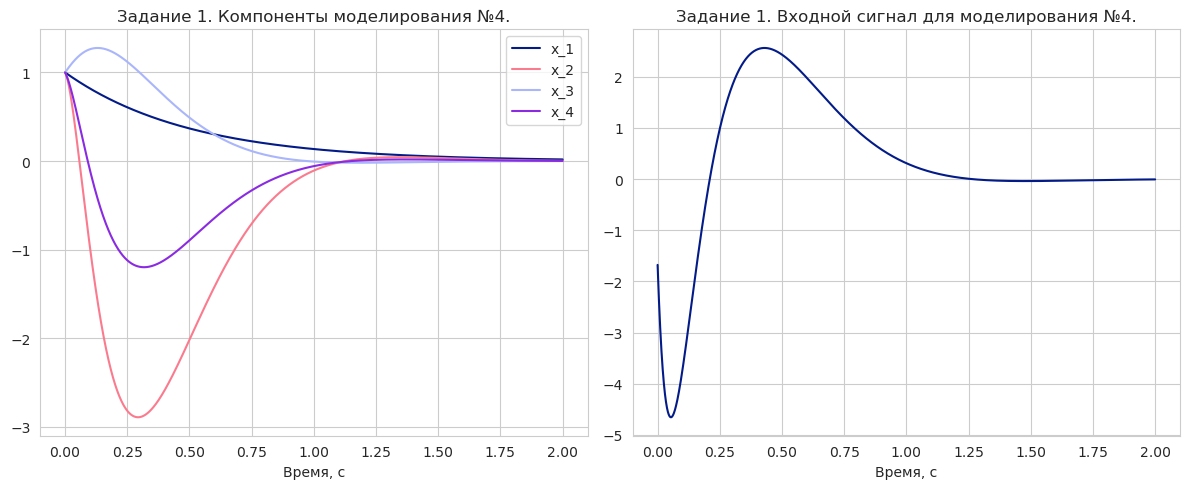

In [37]:
# Create a figure and axes for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot states on the first subplot
axs[0].plot(time_4, y_4.states[0, :], label="x_1")
axs[0].plot(time_4, y_4.states[1, :], label="x_2")
axs[0].plot(time_4, y_4.states[2, :], label="x_3")
axs[0].plot(time_4, y_4.states[3, :], label="x_4")
axs[0].set_title("Задание 1. Компоненты моделирования №4.")
axs[0].grid(True)
axs[0].set_xlabel("Время, с")  # Add x-axis label
axs[0].legend()

# Plot control signal on the second subplot
axs[1].plot(time_4, (K_4 @ y_4.states).reshape(-1))
axs[1].set_title("Задание 1. Входной сигнал для моделирования №4.")
axs[1].grid(True)
axs[1].set_xlabel("Время, с")  # Add x-axis label

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Task 2

In [38]:
A = np.array([
    [0, 2, 0 ,0],
    [-2, 0, 0, 0],
    [0, 0, 0, 4],
    [0, 0, -4, 0]
])
C = np.array([0, 3, 2, 0]).reshape((1,-1))

In [39]:
V = np.concatenate([
    C, C@A, C@A@A, C@A@A@A
])
V

array([[   0,    3,    2,    0],
       [  -6,    0,    0,    8],
       [   0,  -12,  -32,    0],
       [  24,    0,    0, -128]])

In [40]:
np.linalg.matrix_rank(V)

4

In [41]:
J_P, J = sympy.Matrix(A).jordan_form()
J

Matrix([
[-4*I,    0,   0,   0],
[   0, -2*I,   0,   0],
[   0,    0, 2*I,   0],
[   0,    0,   0, 4*I]])

In [42]:
C@J_P

Matrix([[2*I, 3, 3, -2*I]])

In [43]:
Y_5_8 = np.ones((4,1))
Q_1 = scipy.linalg.solve_sylvester(G_1,-A,Y_5_8@C)
Q_2 = scipy.linalg.solve_sylvester(G_2,-A,Y_5_8@C)
Q_3 = scipy.linalg.solve_sylvester(G_3,-A,Y_5_8@C)
Q_4 = scipy.linalg.solve_sylvester(G_4,-A,Y_5_8@C)
L_1 = np.linalg.inv(Q_1)@Y_5_8
L_2 = np.linalg.inv(Q_2)@Y_5_8
L_3 = np.linalg.inv(Q_3)@Y_5_8
L_4 = np.linalg.inv(Q_4)@Y_5_8

In [44]:
L_1, L_2, L_3, L_4

(array([[-0.88888889],
        [ 0.        ],
        [-4.        ],
        [-1.16666667]]),
 array([[ 19509.11111137],
        [-24842.00000033],
        [ 37052.00000049],
        [  8529.33333346]]),
 array([[ 2.5       ],
        [-3.05555556],
        [-6.41666667],
        [-1.75      ]]),
 array([[  0.72222222],
        [-20.83333333],
        [ 16.25      ],
        [-27.08333333]]))

In [45]:
sys_5 = ctrl.ss(A, [[0]]*4,C,0)
sys_5_obs = ctrl.ss(A + L_1@C,-L_1,C,0)
sys_6 = ctrl.ss(A, [[0]]*4,C,0)
sys_6_obs = ctrl.ss(A + L_2@C,-L_2,C,0)
sys_7 = ctrl.ss(A, [[0]]*4,C,0)
sys_7_obs = ctrl.ss(A + L_3@C,-L_3,C,0)
sys_8 = ctrl.ss(A, [[0]]*4,C,0)
sys_8_obs = ctrl.ss(A + L_4@C,-L_4,C,0)

In [46]:
time_5 = np.linspace(0,20,int(20/dt))
y_5 = ctrl.initial_response(sys_5,time_5,X0=np.ones((4,1)))
y_5_obs = ctrl.forced_response(sys_5_obs,time_5,X0=np.array([[2],[0],[0],[-1]]),U=y_5.outputs)
time_6 = np.linspace(0,0.5,int(5/dt))
y_6 = ctrl.initial_response(sys_6,time_6,X0=np.ones((4,1)))
y_6_obs = ctrl.forced_response(sys_6_obs,time_6,X0=np.array([[2],[0],[0],[-1]]),U=y_6.outputs)
time_7 = np.linspace(0,7,int(20/dt))
y_7 = ctrl.initial_response(sys_7,time_7,X0=np.ones((4,1)))
y_7_obs = ctrl.forced_response(sys_7_obs,time_7,X0=np.array([[2],[0],[0],[-1]]),U=y_7.outputs)
time_8 = np.linspace(0,3,int(20/dt))
y_8 = ctrl.initial_response(sys_8,time_8,X0=np.ones((4,1)))
y_8_obs = ctrl.forced_response(sys_8_obs,time_8,X0=np.array([[2],[0],[0],[-1]]),U=y_8.outputs)

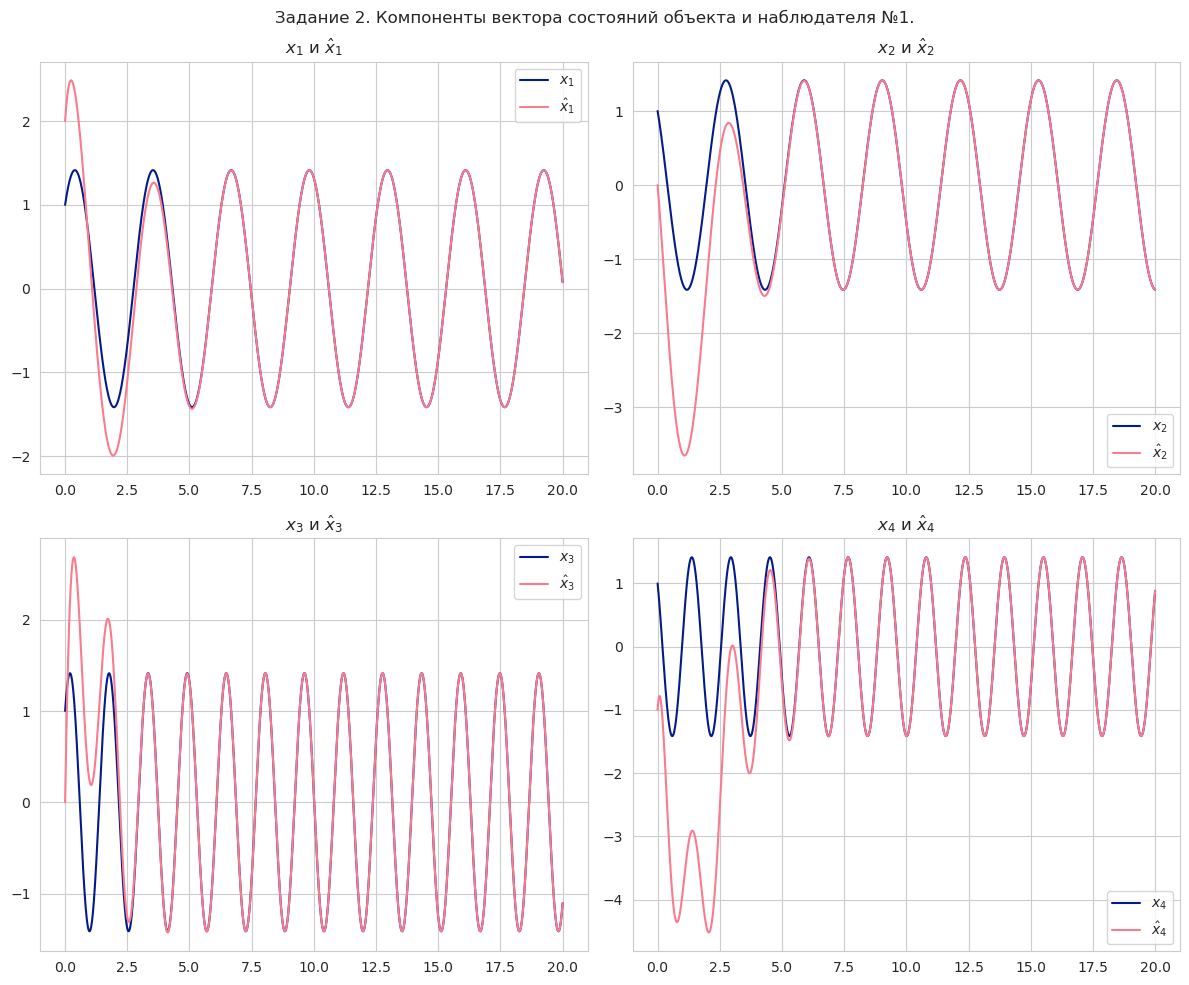

In [47]:
fig, ax = plt.subplots(2,2,figsize=(12,10))
fig.suptitle("Задание 2. Компоненты вектора состояний объекта и наблюдателя №1.")
ax[0,0].plot(time_5,y_5.states[0,:],label="$x_1$")
ax[0,0].plot(time_5,y_5_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid(True)
ax[0,0].legend()
ax[0,0].set_title("$x_1$ и $\hat{x}_1$")
ax[0,1].plot(time_5,y_5.states[1,:],label="$x_2$")
ax[0,1].plot(time_5,y_5_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid(True)
ax[0,1].legend()
ax[0,1].set_title("$x_2$ и $\hat{x}_2$")
ax[1,0].plot(time_5,y_5.states[2,:],label="$x_3$")
ax[1,0].plot(time_5,y_5_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid(True)
ax[1,0].legend()
ax[1,0].set_title("$x_3$ и $\hat{x}_3$")
ax[1,1].plot(time_5,y_5.states[3,:],label="$x_4$")
ax[1,1].plot(time_5,y_5_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid(True)
ax[1,1].legend()
ax[1,1].set_title("$x_4$ и $\hat{x}_4$")
plt.tight_layout()

Text(0.5, 1.0, 'Задание 2. Ошибка наблюдателя №1.')

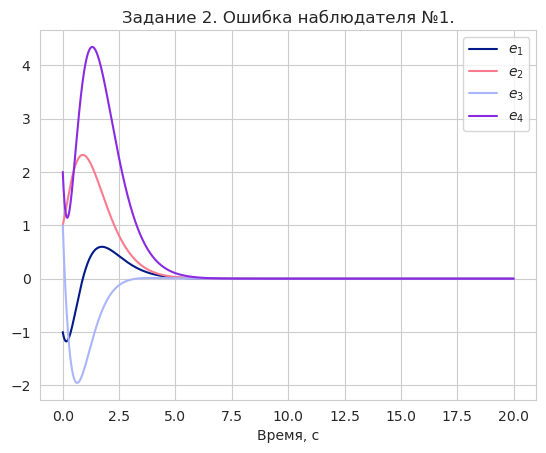

In [48]:
plt.plot(time_5,y_5.states[0,:]-y_5_obs.states[0,:],label="$e_1$")
plt.plot(time_5,y_5.states[1,:]-y_5_obs.states[1,:],label="$e_2$")
plt.plot(time_5,y_5.states[2,:]-y_5_obs.states[2,:],label="$e_3$")
plt.plot(time_5,y_5.states[3,:]-y_5_obs.states[3,:],label="$e_4$")
plt.xlabel("Время, с")
plt.grid(True)
plt.legend()
plt.title("Задание 2. Ошибка наблюдателя №1.")

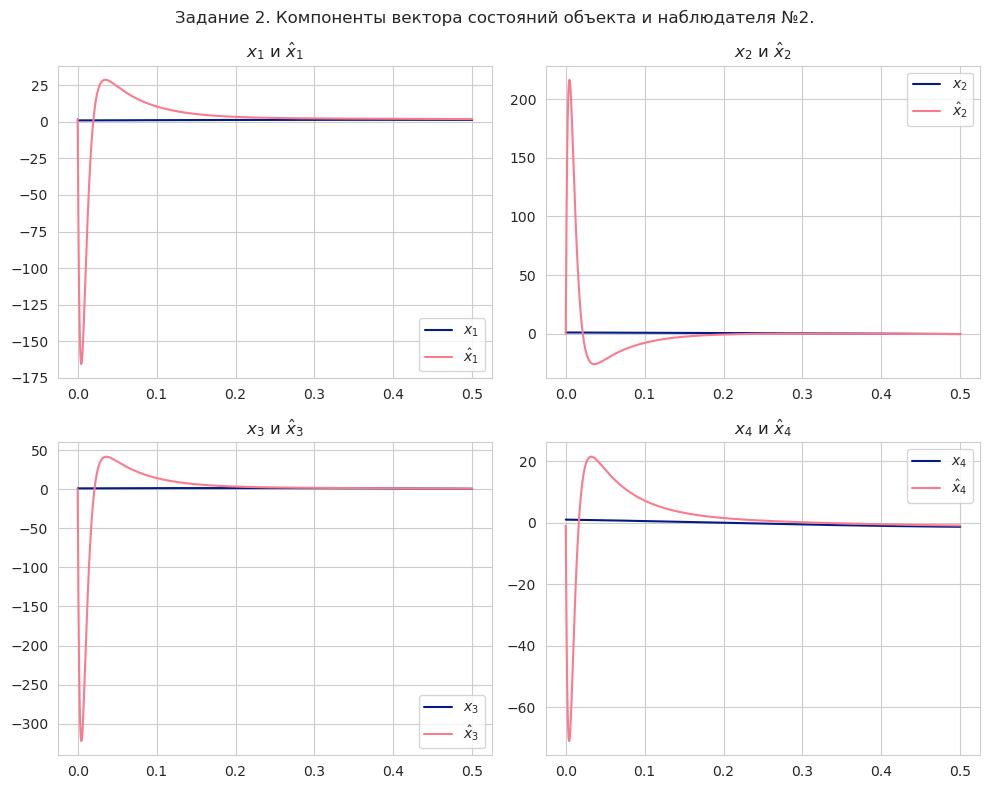

In [49]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Задание 2. Компоненты вектора состояний объекта и наблюдателя №2.")
ax[0,0].plot(time_6,y_6.states[0,:],label="$x_1$")
ax[0,0].plot(time_6,y_6_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid(True)
ax[0,0].legend()
ax[0,0].set_title("$x_1$ и $\hat{x}_1$")
ax[0,1].plot(time_6,y_6.states[1,:],label="$x_2$")
ax[0,1].plot(time_6,y_6_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid(True)
ax[0,1].legend()
ax[0,1].set_title("$x_2$ и $\hat{x}_2$")
ax[1,0].plot(time_6,y_6.states[2,:],label="$x_3$")
ax[1,0].plot(time_6,y_6_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid(True)
ax[1,0].legend()
ax[1,0].set_title("$x_3$ и $\hat{x}_3$")
ax[1,1].plot(time_6,y_6.states[3,:],label="$x_4$")
ax[1,1].plot(time_6,y_6_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid(True)
ax[1,1].legend()
ax[1,1].set_title("$x_4$ и $\hat{x}_4$")
plt.tight_layout()

Text(0.5, 1.0, 'Задание 2. Ошибка наблюдателя №2.')

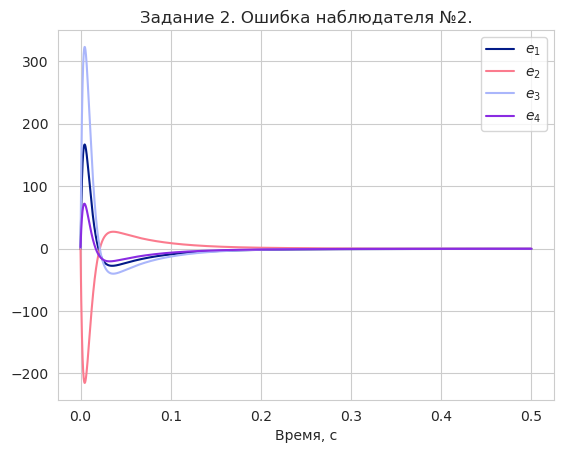

In [50]:
plt.plot(time_6,y_6.states[0,:]-y_6_obs.states[0,:],label="$e_1$")
plt.plot(time_6,y_6.states[1,:]-y_6_obs.states[1,:],label="$e_2$")
plt.plot(time_6,y_6.states[2,:]-y_6_obs.states[2,:],label="$e_3$")
plt.plot(time_6,y_6.states[3,:]-y_6_obs.states[3,:],label="$e_4$")
plt.grid(True)
plt.xlabel("Время, с")
plt.legend()
plt.title("Задание 2. Ошибка наблюдателя №2.")

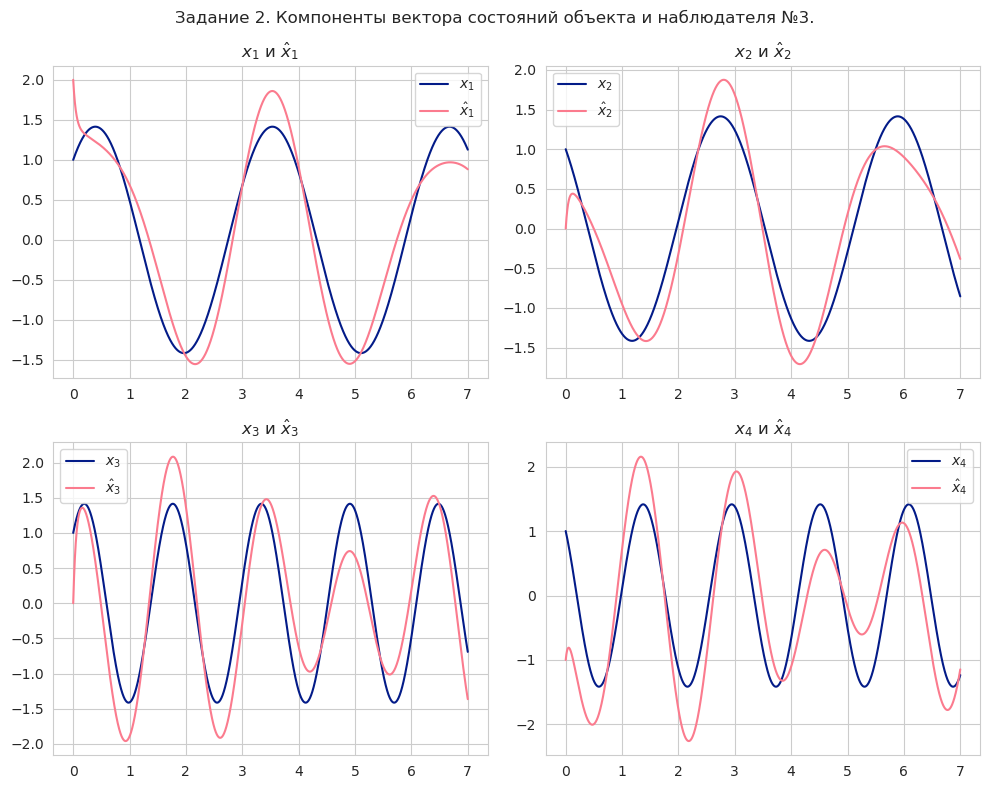

In [51]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Задание 2. Компоненты вектора состояний объекта и наблюдателя №3.")
ax[0,0].plot(time_7,y_7.states[0,:],label="$x_1$")
ax[0,0].plot(time_7,y_7_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid(True)
ax[0,0].legend()
ax[0,0].set_title("$x_1$ и $\hat{x}_1$")
ax[0,1].plot(time_7,y_7.states[1,:],label="$x_2$")
ax[0,1].plot(time_7,y_7_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid(True)
ax[0,1].legend()
ax[0,1].set_title("$x_2$ и $\hat{x}_2$")
ax[1,0].plot(time_7,y_7.states[2,:],label="$x_3$")
ax[1,0].plot(time_7,y_7_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid(True)
ax[1,0].legend()
ax[1,0].set_title("$x_3$ и $\hat{x}_3$")
ax[1,1].plot(time_7,y_7.states[3,:],label="$x_4$")
ax[1,1].plot(time_7,y_7_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid(True)
ax[1,1].legend()
ax[1,1].set_title("$x_4$ и $\hat{x}_4$")
plt.tight_layout()

Text(0.5, 1.0, 'Задание 2. Ошибка наблюдателя №3.')

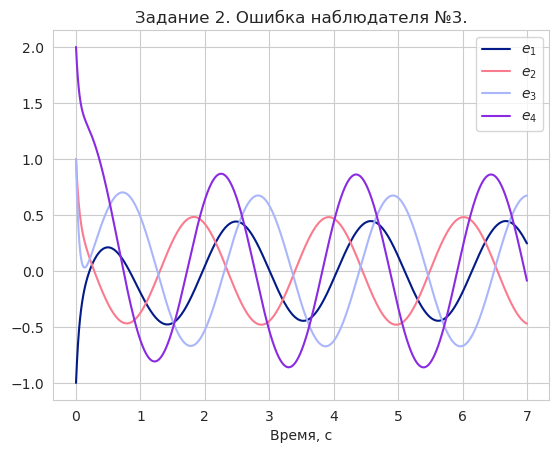

In [52]:
plt.plot(time_7,y_7.states[0,:]-y_7_obs.states[0,:],label="$e_1$")
plt.plot(time_7,y_7.states[1,:]-y_7_obs.states[1,:],label="$e_2$")
plt.plot(time_7,y_7.states[2,:]-y_7_obs.states[2,:],label="$e_3$")
plt.plot(time_7,y_7.states[3,:]-y_7_obs.states[3,:],label="$e_4$")
plt.grid(True)
plt.xlabel("Время, с")
plt.legend()
plt.title("Задание 2. Ошибка наблюдателя №3.")

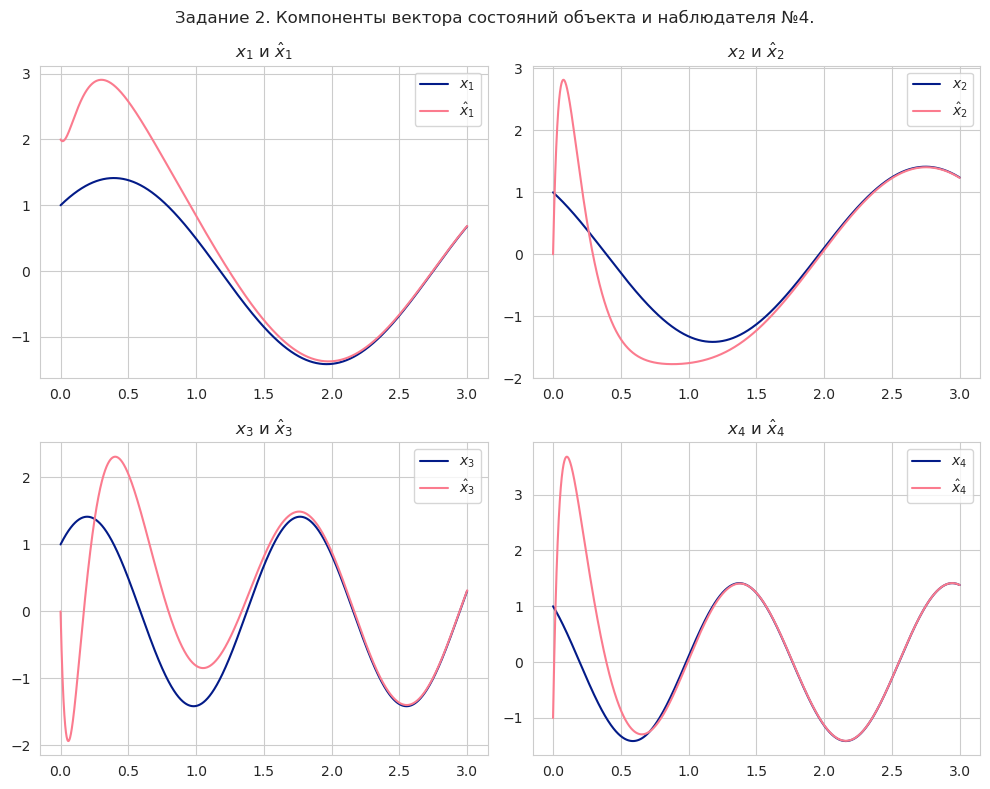

In [53]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Задание 2. Компоненты вектора состояний объекта и наблюдателя №4.")
ax[0,0].plot(time_8,y_8.states[0,:],label="$x_1$")
ax[0,0].plot(time_8,y_8_obs.states[0,:],label="$\hat{x}_1$")
ax[0,0].grid(True)
ax[0,0].legend()
ax[0,0].set_title("$x_1$ и $\hat{x}_1$")
ax[0,1].plot(time_8,y_8.states[1,:],label="$x_2$")
ax[0,1].plot(time_8,y_8_obs.states[1,:],label="$\hat{x}_2$")
ax[0,1].grid(True)
ax[0,1].legend()
ax[0,1].set_title("$x_2$ и $\hat{x}_2$")
ax[1,0].plot(time_8,y_8.states[2,:],label="$x_3$")
ax[1,0].plot(time_8,y_8_obs.states[2,:],label="$\hat{x}_3$")
ax[1,0].grid(True)
ax[1,0].legend()
ax[1,0].set_title("$x_3$ и $\hat{x}_3$")
ax[1,1].plot(time_8,y_8.states[3,:],label="$x_4$")
ax[1,1].plot(time_8,y_8_obs.states[3,:],label="$\hat{x}_4$")
ax[1,1].grid(True)
ax[1,1].legend()
ax[1,1].set_title("$x_4$ и $\hat{x}_4$")
plt.tight_layout()

Text(0.5, 1.0, 'Задание 2. Ошибка наблюдателя №4.')

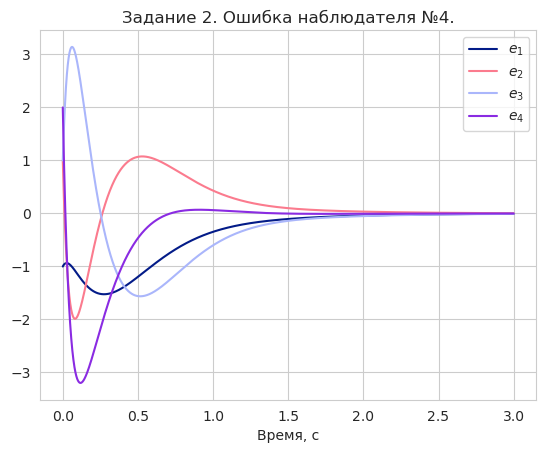

In [54]:
plt.plot(time_8,y_8.states[0,:]-y_8_obs.states[0,:],label="$e_1$")
plt.plot(time_8,y_8.states[1,:]-y_8_obs.states[1,:],label="$e_2$")
plt.plot(time_8,y_8.states[2,:]-y_8_obs.states[2,:],label="$e_3$")
plt.plot(time_8,y_8.states[3,:]-y_8_obs.states[3,:],label="$e_4$")
plt.grid(True)
plt.xlabel("Время, с")
plt.legend()
plt.title("Задание 2. Ошибка наблюдателя №4.")

## Task 3

In [80]:
A = np.array([
    [2, 0, -4, 2],
    [0, 2, -2, 4],
    [-4, -2, 2, 0],
    [2, 4, 0, 2]
])
B = np.array([
    [8],
    [6],
    [4],
    [2]
])
C = np.array([
    [2, 0, 0, 2],
    [-1, 1, 1, 1]
])

In [81]:
J_P, J = sympy.Matrix(A).jordan_form()

In [82]:
J

Matrix([
[-4, 0, 0, 0],
[ 0, 0, 0, 0],
[ 0, 0, 4, 0],
[ 0, 0, 0, 8]])

In [83]:
J_P.inv()@B

Matrix([
[-4],
[ 2],
[ 1],
[ 3]])

In [78]:
C@J_P

Matrix([
[0, 4, 0, 4],
[0, 0, 4, 0]])

In [90]:
G = np.array([
    [-2, 0 ,0 ,0],
    [0, -5, 0, 0],
    [0, 0, -8, 0],
    [0, 0, 0, -16]
])
Y_cont = np.array([1,1,1,1]).reshape((1,-1))
Y_obs = np.array([
    [0, 0],
    [1, 1],
    [1, 1],
    [1, 1]
])
P = scipy.linalg.solve_sylvester(A,-G,B@Y_cont)
K = -Y_cont @ np.linalg.inv(P)
Q = scipy.linalg.solve_sylvester(G,-A,Y_obs@C)
L = np.linalg.pinv(Q)@Y_obs

In [100]:
K, L

(array([[-37.41145833,  15.71354167,  34.88020833,  13.24479167]]),
 array([[-77.75, -77.75],
        [ -0.25,  -0.25],
        [ 67.75,  67.75],
        [-10.25, -10.25]]))

In [91]:
scipy.linalg.eigvals(A + B@K)

array([-16.+0.j,  -8.+0.j,  -5.+0.j,  -2.+0.j])

In [92]:
scipy.linalg.eigvals(A + L@C)

array([-16.+0.j,  -8.+0.j,  -5.+0.j,  -4.+0.j])

In [93]:
A_new = np.block([
    [A + B@K, -B@K],
    [np.zeros_like(A), A + L@C]
])

In [94]:
sys = ctrl.ss(A_new,np.zeros((8,1)),np.zeros((1,8)),0)

In [95]:
time_ = np.linspace(0,3,int(3/dt))

In [101]:
y = ctrl.initial_response(sys,T=time_,X0=[1,1,1,1,2,0,0,-1])

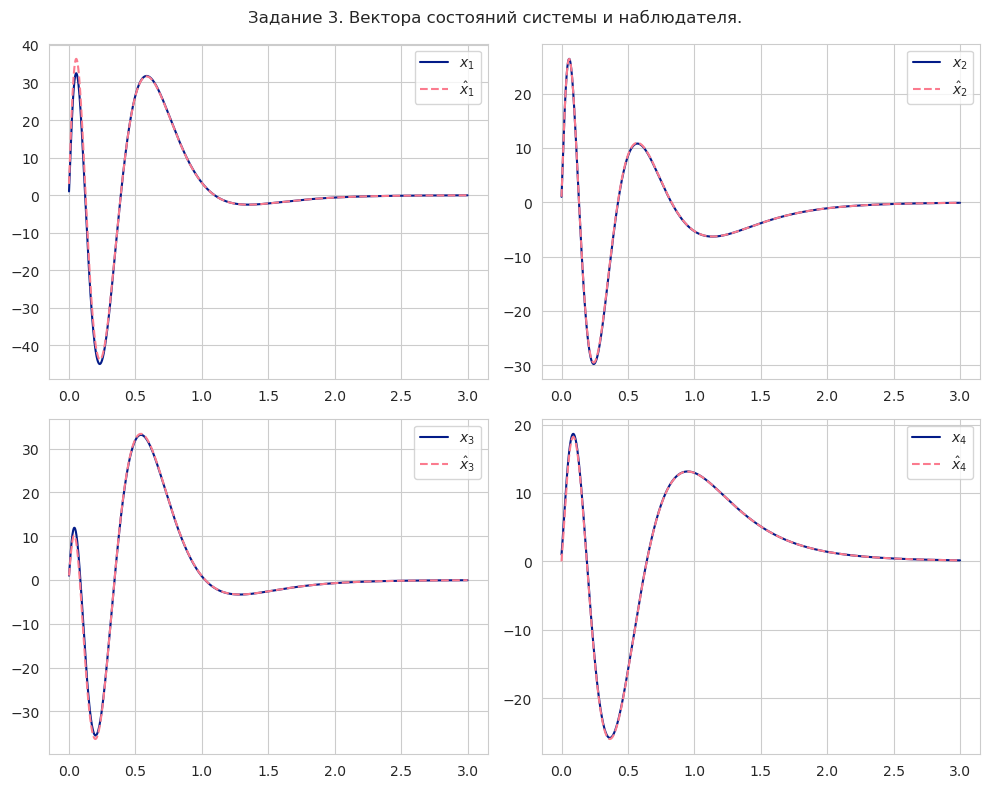

In [108]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
fig.suptitle("Задание 3. Вектора состояний системы и наблюдателя.")
ax[0,0].plot(time_,y.states[0,:],label="$x_1$")
ax[0,0].plot(time_,y.states[0,:]+y.states[4,:],linestyle="--",label="$\hat{x}_1$")
ax[0,0].legend()
ax[0,0].grid(True)
ax[0,1].plot(time_,y.states[1,:],label="$x_2$")
ax[0,1].plot(time_,y.states[1,:]+y.states[5,:],linestyle="--",label="$\hat{x}_2$")
ax[0,1].legend()
ax[0,1].grid(True)
ax[1,0].plot(time_,y.states[2,:],label="$x_3$")
ax[1,0].plot(time_,y.states[2,:]+y.states[6,:],linestyle="--",label="$\hat{x}_3$")
ax[1,0].legend()
ax[1,0].grid(True)
ax[1,1].plot(time_,y.states[3,:],label="$x_4$")
ax[1,1].plot(time_,y.states[3,:]+y.states[7,:],linestyle="--",label="$\hat{x}_4$")
ax[1,1].legend()
ax[1,1].grid(True)
plt.tight_layout()

Text(0.5, 1.0, 'Задание 3. Ошибка наблюдателя.')

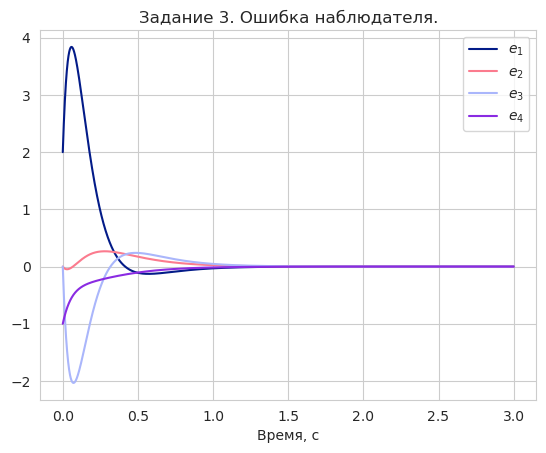

In [109]:
plt.plot(time_,y.states[4,:],label="$e_1$")
plt.plot(time_,y.states[5,:],label="$e_2$")
plt.plot(time_,y.states[6,:],label="$e_3$")
plt.plot(time_,y.states[7,:],label="$e_4$")
plt.legend()
plt.grid(True)
plt.xlabel("Время, с")
plt.title("Задание 3. Ошибка наблюдателя.")

In [105]:
K.shape, y.states[4:,:].shape

((1, 4), (4, 3000))

Text(0.5, 1.0, 'Задание 3. Входной сигнал.')

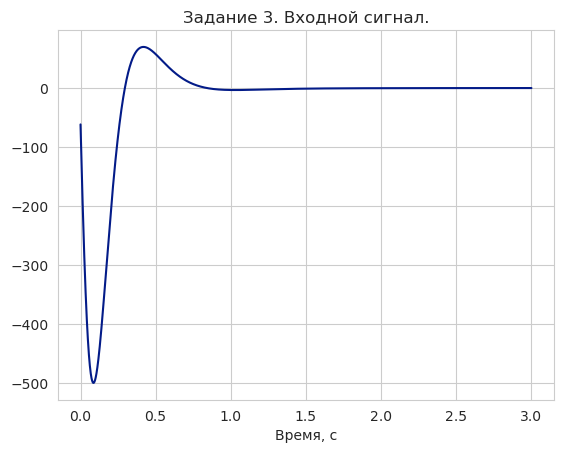

In [111]:
plt.plot(time_,(K@(y.states[4:,:]+y.states[:4,:])).reshape(-1))
plt.grid(True)
plt.xlabel("Время, с")
plt.title("Задание 3. Входной сигнал.")

In [71]:
(C @ y.states[:4,:]).shape

(2, 3000)

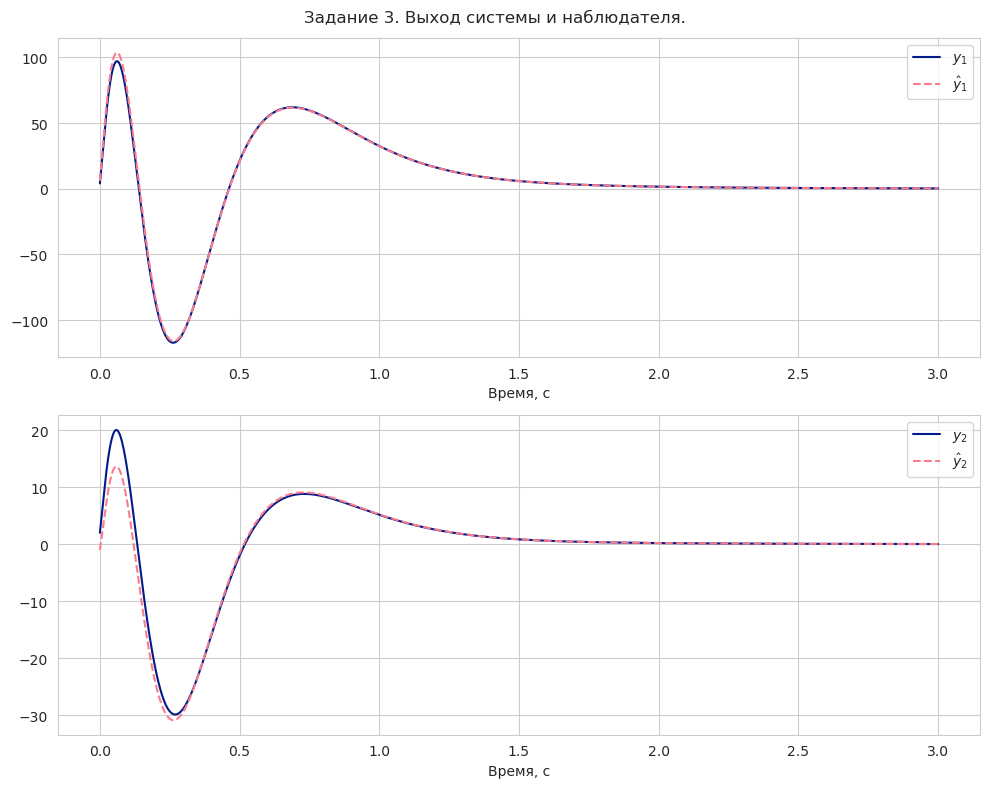

In [114]:
fig, ax = plt.subplots(2,1,figsize=(10,8))
fig.suptitle("Задание 3. Выход системы и наблюдателя.")
ax[0].plot(time_,(C@y.states[:4,:])[0],label="$y_1$")
ax[0].plot(time_,(C@(y.states[4:,:]+y.states[:4,:]))[0],linestyle="--",label="$\hat{y}_1$")
ax[0].legend()
ax[0].set_xlabel("Время, с")
ax[0].grid(True)

ax[1].plot(time_,(C@y.states[:4,:])[1],label="$y_2$")
ax[1].plot(time_,(C@(y.states[4:,:]+y.states[:4,:]))[1],linestyle="--",label="$\hat{y}_2$")
ax[1].legend()
ax[1].set_xlabel("Время, с")
ax[1].grid(True)
plt.tight_layout()

In [73]:
K, L

(array([[ 112.30208333, -118.40885417,   36.03125   ,   29.7421875 ]]),
 array([[ 164.55208333,  164.55208333],
        [-171.63541667, -171.63541667],
        [ -56.73958333,  -56.73958333],
        [ -63.82291667,  -63.82291667]]))